# 2. Análisis predictivo con Regresión Logistica 

In [39]:
#Importamos las librerías que nos vayan a ser necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import clone
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
from tabulate import tabulate
from scipy import stats
import warnings

# Ignorar avisos específicos
warnings.filterwarnings('ignore', category=FutureWarning)


In [4]:
#Cargamos el dataset nuestro 
ruta_fichero = 'C:/Users/alvar/Documentos/Europea/Europea/3º INFORMÁTICA/IA/PRÁCTICA NAVIDAD/dataset_modificado_sin_prec.csv'
fichero = pd.read_csv(ruta_fichero)
fichero

,altitud,tmed,tmin,tmax,dir,velmedia,racha,presMax,presMin,lluvia
0,115,23.5,19.7,27.3,7.0,3.1,8.1,1005.4,1003.1,False
1,410,26.2,17.4,35.1,19.0,4.2,11.4,975.0,971.6,False
2,808,27.0,19.0,35.0,12.0,2.2,8.3,931.8,928.9,False
3,582,23.8,13.0,34.5,99.0,1.4,4.2,957.9,953.3,False
4,17,23.3,18.6,28.0,20.0,2.2,6.1,1021.5,1019.5,False
...,...,...,...,...,...,...,...,...,...,...
7591,23,19.2,13.5,24.3,22.0,2.5,8.9,974.0,969.3,False
7592,8,18.6,14.3,23.0,26.0,5.8,16.9,1014.9,1010.3,False
7593,4,17.8,11.0,24.5,22.0,2.5,8.9,974.0,969.3,False
7594,769,12.6,10.2,15.1,23.0,7.2,19.7,926.7,919.2,True


###### Convertimos la variable de salida a factor: Se convierte la columna de la variable lluvia, que sería la 'Y' de salida a una variable categórica 
###### utilizando pd.Categorical(fdata['Y']). Esto es un paso importante , ya que permite que la columna
###### de salida sea tratada como una variable categórica en lugar de una cadena de texto.

In [5]:
# Verificación de NaN
print(fichero.isna().any())
# Convertir la variable de salida (lluvia) a factor
fichero['lluvia'] = pd.Categorical(fichero['lluvia'])

print(fichero.dtypes)

altitud     False
tmed        False
tmin        False
tmax        False
dir         False
velmedia    False
racha       False
presMax     False
presMin     False
lluvia      False
dtype: bool
altitud        int64
tmed         float64
tmin         float64
tmax         float64
dir          float64
velmedia     float64
racha        float64
presMax      float64
presMin      float64
lluvia      category
dtype: object


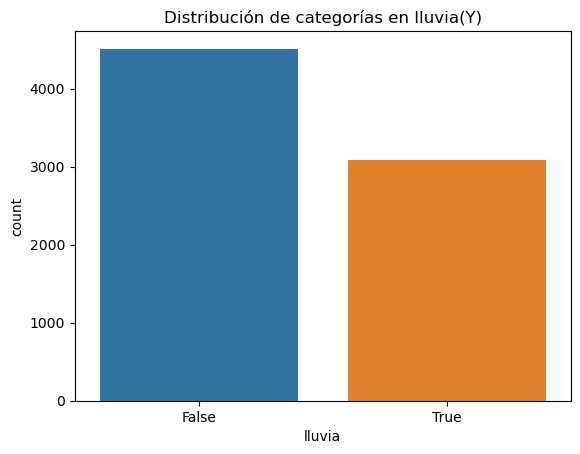

In [6]:
# Crear un gráfico de barras para la variable categórica Y
sns.countplot(x='lluvia', data=fichero)
plt.title('Distribución de categorías en lluvia(Y)')
plt.show()

##### Hemos cogido estas variables porque pensamos que la temperatura puede afectar la capacidad del aire para retener humedad y, por lo tanto, puede estar relacionada con la formación de precipitaciones.
##### La presión atmosférica influye en los sistemas meteorológicos y puede ser un indicador de condiciones climáticas cambiantes, que podrían incluir la lluvia

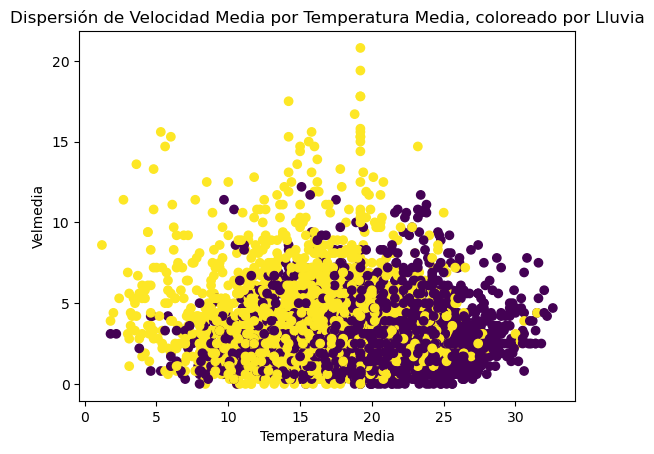

In [7]:
# Graficamos la 'tmed' en el eje X y 'presMax' (temperatura media) en el eje Y, coloreando puntos en si llovió ese día (variable 'lluvia')
# Creamos un gráfico de dispersión
plt.scatter(fichero['tmed'], fichero['velmedia'], c=fichero['lluvia'].cat.codes, cmap='viridis')

# Etiquetas para los ejes
plt.xlabel('Temperatura Media')
plt.ylabel('Velmedia')

# Título del gráfico
plt.title('Dispersión de Velocidad Media por Temperatura Media, coloreado por Lluvia')

# Mostrar el gráfico
plt.show()

##### Existe una separación notable entre los días de lluvia (puntos morados) y los días sin lluvia (puntos amarillos) en relación con la velocidad media del viento. Los días de lluvia tienden a tener velocidades de viento más bajas en este conjunto de datos.

In [8]:
# Visualización de la matriz de gráficos de dispersión
#sns.pairplot(fichero_modificado, hue='lluvia', palette='viridis', plot_kws={'alpha': 0.3})
#plt.show()

Matriz de Correlación:
              tmed  velmedia
tmed      1.000000 -0.145594
velmedia -0.145594  1.000000


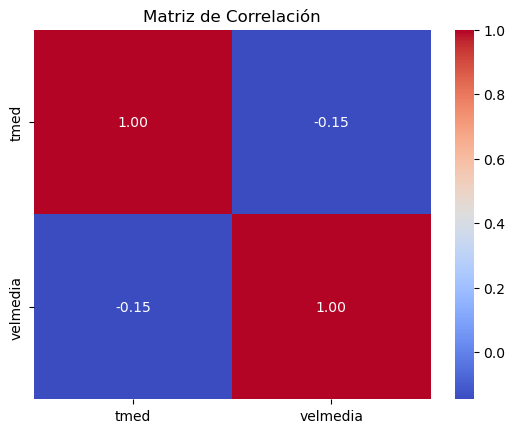

In [9]:
# Calcular la matriz de correlación
correlation_matrix = fichero[['tmed', 'velmedia']].corr()
# No podemos poner la Y por que solo permite variables numericas

# Imprimir la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Matriz de Correlación entre 'tmed', 'velmedia' y 'lluvia':
              tmed  velmedia    lluvia
tmed      1.000000 -0.145594 -0.456720
velmedia -0.145594  1.000000  0.256867
lluvia   -0.456720  0.256867  1.000000


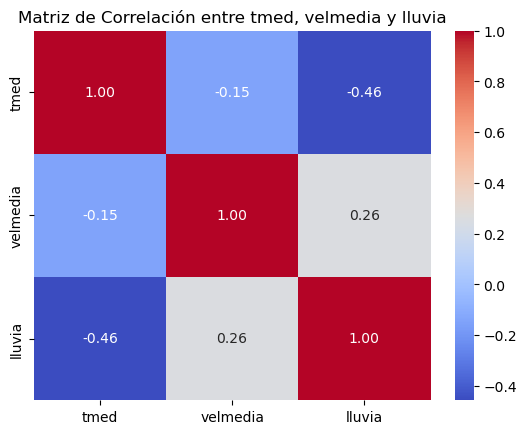

In [10]:
# Creamos una copia del Dataset 
prueba_correlacion = fichero.copy()

# Convertir "YES" a 1 y "NO" a 0 en la columna Y
prueba_correlacion['lluvia'] = prueba_correlacion['lluvia'].replace({'True': 1, 'False': 0})

# Convertir la columna Y de categórica a numérica
prueba_correlacion['lluvia'] = prueba_correlacion['lluvia'].astype('category').cat.codes

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = prueba_correlacion[['tmed', 'velmedia', 'lluvia']].corr()

# Imprimir la matriz de correlación
print("Matriz de Correlación entre 'tmed', 'velmedia' y 'lluvia':")
print(correlation_matrix)

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre tmed, velmedia y lluvia')
plt.show()

##### Podemos observar en azul oscuro una correlación entre 'tmed' y 'lluvia'. La correlación es aproximadamente -0.46, lo que sugiere una correlación negativa moderada. Esto podría indicar que a medida que la temperatura media aumenta, la probabilidad de lluvia disminuye, o viceversa.

In [11]:
from sklearn.model_selection import train_test_split

X = fichero.drop('lluvia', axis=1)  # Definimos X como todas las variables en el dataset excepto 'lluvia'
y = fichero['lluvia']  # Variable de salida (lluvia)

# División en 80/20 para entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42 se usa para asegurar que cada vez que se ejecute el código, la división será la misma.

# Imprimir tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))

Tamaño del conjunto de entrenamiento: 6076
Tamaño del conjunto de validación: 1520


In [12]:
# Crear conjuntos de entrenamiento y prueba
conjunto_train = pd.concat([X_train, y_train], axis=1)
conjunto_val = pd.concat([X_val, y_val], axis=1)


# Creamos dos conjuntos para poner las predicciones del train y test
conjunto_train_eval = conjunto_train.copy()
conjunto_validation_eval = conjunto_val.copy()

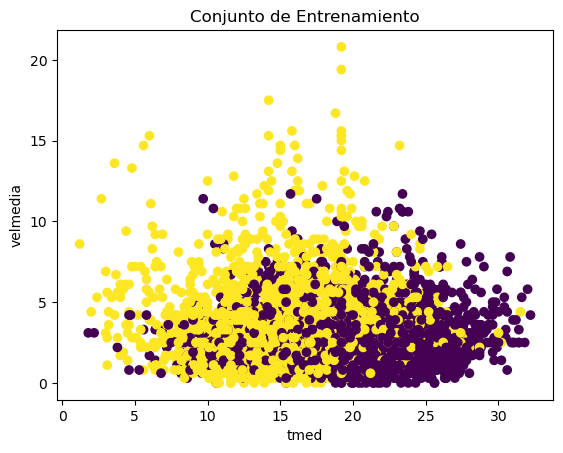

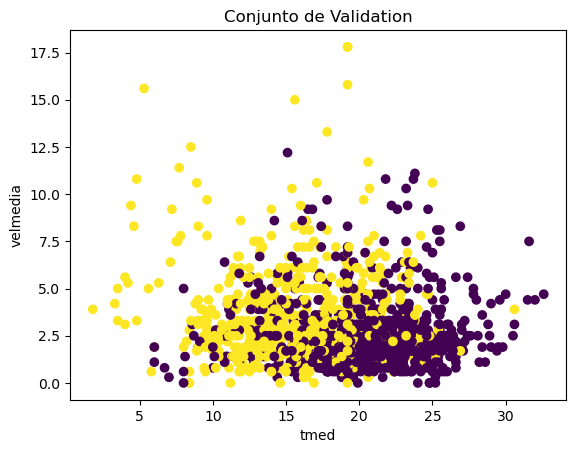

In [13]:
# Hacemos un gráfico utilizando el conjunto de entrenamiento
plt.scatter(conjunto_train['tmed'], conjunto_train['velmedia'], c=conjunto_train['lluvia'].cat.codes, cmap='viridis')
plt.xlabel('tmed')
plt.ylabel('velmedia')
plt.title('Conjunto de Entrenamiento')
plt.show()

# Hacemos lo mismo con el conjunto de validación
plt.scatter(conjunto_val['tmed'], conjunto_val['velmedia'], c=conjunto_val['lluvia'].cat.codes, cmap='viridis')
plt.xlabel('tmed')
plt.ylabel('velmedia')
plt.title('Conjunto de Validation')
plt.show()

In [14]:
# Método de control (k-fold cross-validation)
metodo_control_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
'''StratifiedKFold es una variante de la validación cruzada K-fold que se utiliza para dividir los datos en n_splits conjuntos,
en este caso 10, preservando el porcentaje de muestras para cada clase. Esto es particularmente útil en conjuntos de datos 
donde hay una distribución desigual de las clases (por ejemplo, si tienes muchos más días sin lluvia que con lluvia).'''

'StratifiedKFold es una variante de la validación cruzada K-fold que se utiliza para dividir los datos en n_splits conjuntos,\nen este caso 10, preservando el porcentaje de muestras para cada clase. Esto es particularmente útil en conjuntos de datos \ndonde hay una distribución desigual de las clases (por ejemplo, si tienes muchos más días sin lluvia que con lluvia).'

In [15]:
# Establecer la semilla para reproducibilidad
np.random.seed(150)

# Definir el modelo de regresión logística
logreg_model = LogisticRegression()

# Crear un pipeline con escalado de características
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('model', logreg_model)        # Modelo de regresión logística
])


# Realizar validación cruzada y obtener predicciones
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=metodo_control_cv, method='predict_proba')
y_val_pred_raw = cross_val_predict(pipeline, X_train, y_train, cv=metodo_control_cv)

In [16]:
# Obtener todos los modelos de regresión logística entrenados durante la validación cruzada
modelo_regresionLogistica_1 = [clone(pipeline).fit(X_train.iloc[train_idx], y_train.iloc[train_idx]) for train_idx, _ in metodo_control_cv.split(X_train, y_train)]

# Obtener los coeficientes de cada modelo entrenado
coeficientes_cv = [modelo.named_steps['model'].coef_ for modelo in modelo_regresionLogistica_1]

# Imprimir información sobre el modelo
for i, (modelo, coeficientes) in enumerate(zip(modelo_regresionLogistica_1, coeficientes_cv)):
    print(f"\nModelo de regresión logística entrenado en el pliegue {i + 1}:")
    print(f"Peso de X1 y X2:", coeficientes)
    precision = modelo.score(X_train, y_train)
    print("Precisión en el step:", precision)


Modelo de regresión logística entrenado en el pliegue 1:
Peso de X1 y X2: [[-0.25648445 -0.21703423  0.46822689 -1.39576349  0.01261113 -0.42590561
   0.87615761  2.46287399 -2.5563862 ]]
Precisión en el step: 0.7753456221198156

Modelo de regresión logística entrenado en el pliegue 2:
Peso de X1 y X2: [[-0.24117806 -0.07816372  0.42941547 -1.52486482  0.01359812 -0.40834802
   0.8594217   2.25978298 -2.3690238 ]]
Precisión en el step: 0.7736998025016458

Modelo de regresión logística entrenado en el pliegue 3:
Peso de X1 y X2: [[-0.30121006 -0.17850381  0.4331208  -1.41992446  0.02340856 -0.42768551
   0.85174369  2.21516328 -2.34259573]]
Precisión en el step: 0.7733706385780118

Modelo de regresión logística entrenado en el pliegue 4:
Peso de X1 y X2: [[-0.25039266 -0.17374628  0.42865355 -1.43730783  0.02269158 -0.42171907
   0.89469745  2.26877361 -2.34729643]]
Precisión en el step: 0.7741935483870968

Modelo de regresión logística entrenado en el pliegue 5:
Peso de X1 y X2: [[-0.

In [17]:
accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=metodo_control_cv, scoring='accuracy')

# Imprimir resultados de validación cruzada
print("Precisión:", np.mean(accuracy_scores))
print("Desviación estándar:", np.std(accuracy_scores))

precision_train = {}
precision_train['regresion_todosValores'] = np.mean(accuracy_scores)

Precisión: 0.7738614194051852
Desviación estándar: 0.012873962156844262


In [18]:
## INFORMACION SOBRE LA IMPORTANCIA DE LAS VARIABLES


# Crear listas para almacenar los coeficientes de cada variable en todos los pliegues
all_coefs = []

# Iterar sobre los modelos entrenados en cada pliegue
for i, modelo in enumerate(modelo_regresionLogistica_1):
    # Obtener los coeficientes del modelo
    coeficientes = modelo.named_steps['model'].coef_[0]
    all_coefs.append(coeficientes)

# Calcular el promedio de los coeficientes
average_coefs = np.mean(all_coefs, axis=0)

# Calcular el error estándar de los coeficientes
std_error_coefs = np.std(all_coefs, axis=0)

# Calcular el t-value y el p-value para cada coeficiente basado en la distribución t
df = len(y_train) - len(average_coefs)  # Grados de libertad
t_values = average_coefs / std_error_coefs
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=df))

In [19]:
# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre los coeficientes y p-values
for variable, coef, p_val in zip(X_train.columns, average_coefs, p_values):
    # Determinar la importancia basada en el p-value
    if p_val == 0:
        importancia = '****'
    elif 0 < p_val < 0.001:
        importancia = '***'
    elif 0.001 <= p_val < 0.01:
        importancia = '**'
    elif 0.01 <= p_val < 0.05:
        importancia = '*'
    else:
        importancia = ''

    # Agregar los resultados a la lista
    resultados.append([variable, coef, std_error_coefs[X_train.columns.get_loc(variable)], t_values[X_train.columns.get_loc(variable)], p_val, importancia])

# Crear una tabla usando tabulate
headers = ['Variable', 'Estimate', 'Std. Error', 't value', 'Pr(>|t|)', 'Importante']
tabla_resultados = tabulate(resultados, headers=headers, tablefmt='pretty', showindex=False)

# Imprimir la tabla
print(tabla_resultados)



+----------+----------------------+----------------------+---------------------+----------------------+------------+
| Variable |       Estimate       |      Std. Error      |       t value       |       Pr(>|t|)       | Importante |
+----------+----------------------+----------------------+---------------------+----------------------+------------+
| altitud  | -0.2630668447960906  | 0.025670426098086976 | -10.247856572029983 |         0.0          |    ****    |
|   tmed   | -0.18590069452985952 | 0.08730081096723305  | -2.1294268915741728 | 0.033259105006104406 |     *      |
|   tmin   | 0.44613647562526504  | 0.033853055020292795 |  13.17861786352322  |         0.0          |    ****    |
|   tmax   | -1.4274307459762288  | 0.06357405374122065  | -22.45303959672938  |         0.0          |    ****    |
|   dir    | 0.012105628907772288 | 0.011919385048119933 | 1.0156252909777197  |  0.3098483562152694  |            |
| velmedia | -0.41297340349354694 | 0.017332808428436194 |  -23.

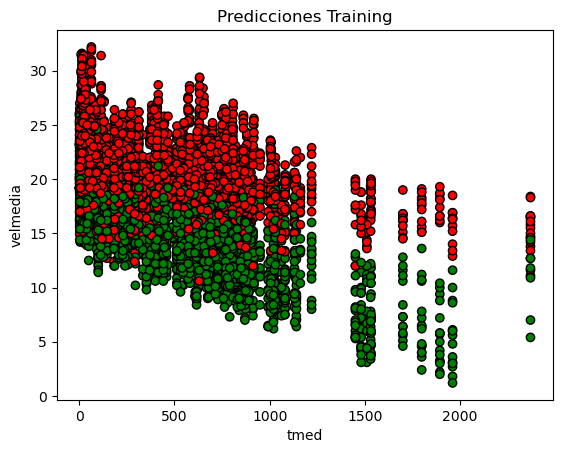

In [20]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_proba = np.array([modelo.predict_proba(X_train)[:, 1] for modelo in modelo_regresionLogistica_1])
y_train_pred_raw = np.array([modelo.predict(X_train) for modelo in modelo_regresionLogistica_1])


# Mapa de colores para las clases
class_color_map = {True: 'green', False: 'red'}

# Función para crear un scatter plot con colores basados en las clases predichas
def plot_predictions(X, y_pred, title):
    colors = np.array([class_color_map[label] for label in y_pred])
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
    plt.title(title)
    plt.xlabel('tmed')
    plt.ylabel('velmedia')
    plt.show()

# Plot de las predicciones en el conjunto de entrenamiento
plot_predictions(X_train.values, y_train_pred_raw[0], title='Predicciones Training')

In [21]:
# Matriz de confusión para el conjunto de entrenamiento
confusion_matrix_train = confusion_matrix(y_train, y_train_pred_raw[0], labels=[True, False])

# Imprimir las matrices de confusión
print("Matriz de Confusión - Conjunto de Entrenamiento:")
print(confusion_matrix_train)


Matriz de Confusión - Conjunto de Entrenamiento:
[[1704  766]
 [ 599 3007]]


In [22]:
# Calculamos la precisión en el conjunto de entrenamiento
precision_regresionLogaritmica1_train = np.mean([modelo.score(conjunto_train.drop('lluvia', axis=1), conjunto_train['lluvia']) for modelo in modelo_regresionLogistica_1])
desviacionestandar_regresionLogaritmica1_train = np.std([modelo.score(conjunto_train.drop('lluvia', axis=1), conjunto_train['lluvia']) for modelo in modelo_regresionLogistica_1])
# Imprimir la precisión en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", precision_regresionLogaritmica1_train)

precision_train = {}
precision_train['regresion_todosValores'] = precision_regresionLogaritmica1_train

Precisión en el conjunto de entrenamiento: 0.7742429229756419


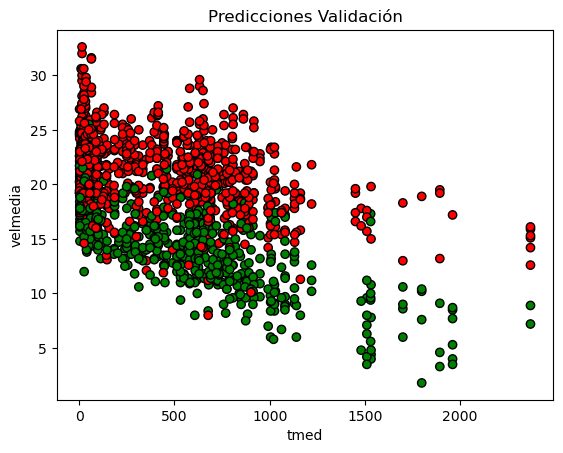

In [23]:
# Realizar predicciones en el conjunto de validación
y_val_pred_proba = np.array([modelo.predict_proba(conjunto_val.drop('lluvia', axis=1))[:, 1] for modelo in modelo_regresionLogistica_1])
y_val_pred_raw = np.array([modelo.predict(conjunto_val.drop('lluvia', axis=1)) for modelo in modelo_regresionLogistica_1])

# Plot de las predicciones en el conjunto de validación
plot_predictions(conjunto_val.drop('lluvia', axis=1).values, y_val_pred_raw[0], title='Predicciones Validación')

In [24]:
# Matriz de confusión para el conjunto de validación
confusion_matrix_val = confusion_matrix(conjunto_val['lluvia'], y_val_pred_raw[0], labels=[True, False])

# Imprimir la matriz de confusión
print("Matriz de Confusión - Conjunto de Validación:")
print(confusion_matrix_val)

Matriz de Confusión - Conjunto de Validación:
[[427 187]
 [135 771]]


In [25]:
# Calcular la precisión en el conjunto de validación
precision_regresionLogaritmica1_val = np.mean([modelo.score(conjunto_val.drop('lluvia', axis=1), conjunto_val['lluvia']) for modelo in modelo_regresionLogistica_1])
desviacionestandar_regresionLogaritmica1_val = np.std([modelo.score(conjunto_val.drop('lluvia', axis=1), conjunto_val['lluvia']) for modelo in modelo_regresionLogistica_1])

# Imprimir la precisión en el conjunto de validación
print("Precisión en el conjunto de validación:", precision_regresionLogaritmica1_val)

precision_val = {}
precision_val['regresion_todosValores'] = precision_regresionLogaritmica1_val

Precisión en el conjunto de validación: 0.7860526315789473


## Regresion logistica - version 2 : variable 'tmed' al cuadrado 

In [26]:
# Agregar la variable cuadrática X1^2 al conjunto de datos
X_train['tmed_cuadrado'] = X_train['tmed'] ** 2

In [27]:
# Establecer la semilla para reproducibilidad
np.random.seed(150)

# Definir el modelo de regresión logística con la nueva variable cuadrática
modelo_regresionLogistica_tmed_cuadrado = LogisticRegression()

# Crear un pipeline con escalado de características, incluyendo la variable cuadrática
pipeline_tmed_cuadrado = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('model', modelo_regresionLogistica_tmed_cuadrado)        # Modelo de regresión logística
])

# Realizar validación cruzada y obtener predicciones con el nuevo modelo
y_pred_cv_tmed_cuadrado = cross_val_predict(pipeline_tmed_cuadrado, X_train[['tmed_cuadrado', 'velmedia']], y_train, cv=metodo_control_cv, method='predict_proba')
y_val_pred_raw_tmed_cuadrado = cross_val_predict(pipeline_tmed_cuadrado, X_train[['tmed_cuadrado', 'velmedia']], y_train, cv=metodo_control_cv)

# Obtener todos los modelos de regresión logística entrenados durante la validación cruzada
modelo_regresionLogistica_1_tmed_cuadrado = [clone(pipeline_tmed_cuadrado).fit(X_train.iloc[train_idx][['tmed_cuadrado', 'velmedia']], y_train.iloc[train_idx]) for train_idx, _ in metodo_control_cv.split(X_train, y_train)]

# Obtener los coeficientes de cada modelo entrenado
coeficientes_cv_tmed_cuadrado = [modelo.named_steps['model'].coef_ for modelo in modelo_regresionLogistica_1_tmed_cuadrado]

# Imprimir información sobre el modelo
for i, (modelo, coeficientes) in enumerate(zip(modelo_regresionLogistica_1_tmed_cuadrado, coeficientes_cv_tmed_cuadrado)):
    print(f"\nModelo de regresión logística entrenado en el pliegue {i + 1}:")
    print(f"Peso de velmedia(X2) y tmed (X1^2):", coeficientes)
    precision = modelo.score(X_train[['tmed_cuadrado', 'velmedia']], y_train)
    print("Precisión en el step:", precision)


Modelo de regresión logística entrenado en el pliegue 1:
Peso de velmedia(X2) y tmed (X1^2): [[-1.12563061  0.56132788]]
Precisión en el step: 0.7397959183673469

Modelo de regresión logística entrenado en el pliegue 2:
Peso de velmedia(X2) y tmed (X1^2): [[-1.14950526  0.56692598]]
Precisión en el step: 0.7409479921000658

Modelo de regresión logística entrenado en el pliegue 3:
Peso de velmedia(X2) y tmed (X1^2): [[-1.12521912  0.53526494]]
Precisión en el step: 0.7414417379855168

Modelo de regresión logística entrenado en el pliegue 4:
Peso de velmedia(X2) y tmed (X1^2): [[-1.15518705  0.56402526]]
Precisión en el step: 0.7409479921000658

Modelo de regresión logística entrenado en el pliegue 5:
Peso de velmedia(X2) y tmed (X1^2): [[-1.15102601  0.53105178]]
Precisión en el step: 0.7411125740618828

Modelo de regresión logística entrenado en el pliegue 6:
Peso de velmedia(X2) y tmed (X1^2): [[-1.14440842  0.54994482]]
Precisión en el step: 0.7414417379855168

Modelo de regresión l

In [28]:
accuracy_scores_tmed_cuadrado = cross_val_score(pipeline_tmed_cuadrado, X_train, y_train, cv=metodo_control_cv, scoring='accuracy')

# Imprimir resultados de validación cruzada
print("Precisión con variable cuadrática:", np.mean(accuracy_scores_tmed_cuadrado))
print("Desviación estándar:", np.std(accuracy_scores_tmed_cuadrado))

precision_train['regresion_tmed_cuadrado'] = np.mean(accuracy_scores_tmed_cuadrado)

Precisión con variable cuadrática: 0.7718874642330703
Desviación estándar: 0.013063806018508699


In [29]:
# Crear listas para almacenar los coeficientes de cada variable en todos los pliegues
all_coefs_tmed_cuadrado = []

# Iterar sobre los modelos entrenados en cada pliegue
for i, modelo in enumerate(modelo_regresionLogistica_1_tmed_cuadrado):
    # Obtener los coeficientes del modelo
    coeficientes_tmed_cuadrado = modelo.named_steps['model'].coef_[0]
    all_coefs_tmed_cuadrado.append(coeficientes_tmed_cuadrado)

# Calcular el promedio de los coeficientes
average_coefs_tmed_cuadrado = np.mean(all_coefs_tmed_cuadrado, axis=0)

# Calcular el error estándar de los coeficientes
std_error_coefs_tmed_cuadrado = np.std(all_coefs_tmed_cuadrado, axis=0)

# Calcular el t-value y el p-value para cada coeficiente basado en la distribución t
df_tmed_cuadrado = len(y_train) - len(average_coefs_tmed_cuadrado)  # Grados de libertad
t_values_tmed_cuadrado = average_coefs_tmed_cuadrado / std_error_coefs_tmed_cuadrado
p_values_tmed_cuadrado = 2 * (1 - stats.t.cdf(np.abs(t_values_tmed_cuadrado), df=df_tmed_cuadrado))

# Crear listas para almacenar los resultados
resultados_tmed_cuadrado = []

# Iterar sobre los coeficientes y p-values
for variable, coef, p_val in zip(['tmed_cuadrado', 'velmedia'], average_coefs_tmed_cuadrado, p_values_tmed_cuadrado):
    # Determinar la importancia basada en el p-value
    if p_val == 0:
        importancia = '****'
    elif 0 < p_val < 0.001:
        importancia = '***'
    elif 0.001 <= p_val < 0.01:
        importancia = '**'
    elif 0.01 <= p_val < 0.05:
        importancia = '*'
    else:
        importancia = ''

    # Agregar los resultados a la lista
    resultados_tmed_cuadrado.append([variable, coef, std_error_coefs_tmed_cuadrado, t_values_tmed_cuadrado, p_val, importancia])

# Crear una tabla usando tabulate
headers_tmed_cuadrado = ['Variable', 'Estimate', 'Std. Error', 't value', 'Pr(>|t|)', 'Importante']
tabla_resultados_tmed_cuadrado = tabulate(resultados_tmed_cuadrado, headers=headers_tmed_cuadrado, tablefmt='pretty', showindex=False)

# Imprimir la tabla
print(tabla_resultados_tmed_cuadrado)

+---------------+---------------------+-------------------------+-----------------------------+----------+------------+
|   Variable    |      Estimate       |       Std. Error        |           t value           | Pr(>|t|) | Importante |
+---------------+---------------------+-------------------------+-----------------------------+----------+------------+
| tmed_cuadrado | -1.1396519815227415 | [0.01278461 0.01511422] | [-89.14248294  36.66593849] |   0.0    |    ****    |
|   velmedia    | 0.5541769977721731  | [0.01278461 0.01511422] | [-89.14248294  36.66593849] |   0.0    |    ****    |
+---------------+---------------------+-------------------------+-----------------------------+----------+------------+


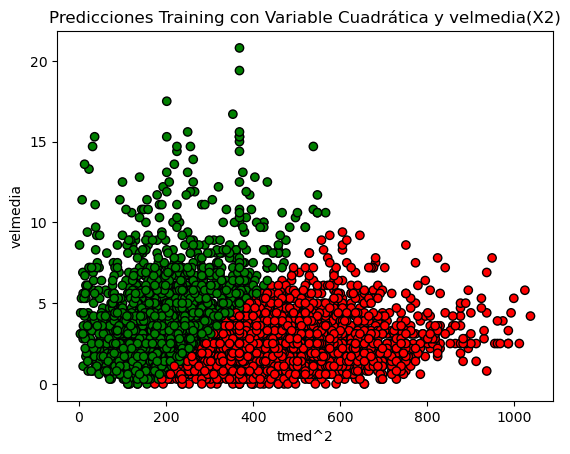

In [30]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_proba_tmed_cuadrado = np.array([modelo.predict_proba(X_train[['tmed_cuadrado', 'velmedia']])[:, 1] for modelo in modelo_regresionLogistica_1_tmed_cuadrado])
y_train_pred_raw_tmed_cuadrado = np.array([modelo.predict(X_train[['tmed_cuadrado', 'velmedia']]) for modelo in modelo_regresionLogistica_1_tmed_cuadrado])



# Función para crear un scatter plot con colores basados en las clases predichas
def plot_predictions(X, y_pred, title):
    colors = np.array([class_color_map[label] for label in y_pred])
    plt.scatter(X['tmed_cuadrado'], X['velmedia'], c=colors, edgecolors='k')
    plt.title(title)
    plt.xlabel('tmed^2')
    plt.ylabel('velmedia')
    plt.show()

# Plot de las predicciones en el conjunto de entrenamiento
plot_predictions(X_train, y_train_pred_raw_tmed_cuadrado[0], title='Predicciones Training con Variable Cuadrática y velmedia(X2)')

In [31]:
# Matriz de confusión para el conjunto de entrenamiento
confusion_matrix_train_tmed_cuadrado = confusion_matrix(y_train, y_train_pred_raw_tmed_cuadrado[0], labels=[True, False])


# Imprimir las matrices de confusión
print("Matriz de Confusión - Conjunto de Entrenamiento:")
print(confusion_matrix_train_tmed_cuadrado)

Matriz de Confusión - Conjunto de Entrenamiento:
[[1510  960]
 [ 621 2985]]


In [32]:
from sklearn.metrics import accuracy_score

# Calcular la precisión de las predicciones en el conjunto de entrenamiento con la variable cuadrática X1^2
precision_train_squared = accuracy_score(conjunto_train['lluvia'], y_train_pred_raw_tmed_cuadrado[0])

# Imprimir la precisión en el conjunto de validación
print("Precisión en el conjunto de entrenamiento:", precision_train_squared)

precision_train['regresion_tmed_cuadrado'] = precision_train_squared

Precisión en el conjunto de entrenamiento: 0.7397959183673469


In [33]:
# Agregar la variable cuadrática tmed^2 al conjunto de datos
conjunto_val['tmed_cuadrado'] = conjunto_val['tmed'] ** 2

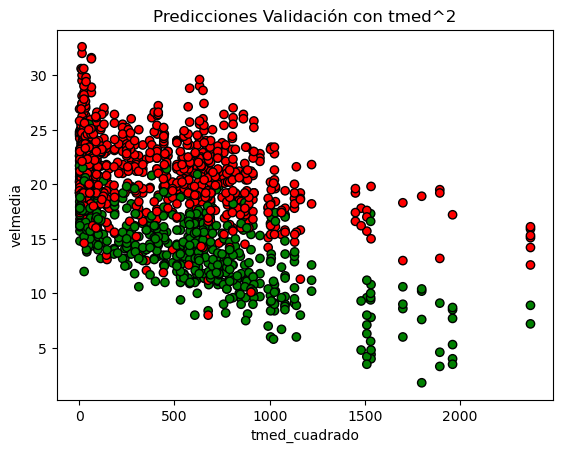

In [34]:
# Realizar predicciones en el conjunto de validación
y_val_pred_proba_squared = np.array([modelo.predict_proba(X_val)[:, 1] for modelo in modelo_regresionLogistica_1])
y_val_pred_raw_squared = np.array([modelo.predict(X_val) for modelo in modelo_regresionLogistica_1])

# Plot de las predicciones en el conjunto de validación con la variable cuadrática tmed^2
def plot_predictions(X, y_pred, title):
    colors = np.array([class_color_map[label] for label in y_pred])
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
    plt.title(title)
    plt.xlabel('tmed_cuadrado')
    plt.ylabel('velmedia')
    plt.show()


plot_predictions(X_val.values, y_val_pred_raw_squared[0], title='Predicciones Validación con tmed^2')

In [35]:
# Matriz de confusión para el conjunto de validación con la variable cuadrática tmed^2
confusion_matrix_val_squared = confusion_matrix(y_val, y_val_pred_raw_squared[0], labels=[True, False])

# Imprimir la matriz de confusión
print("Matriz de Confusión - Conjunto de Validación con tmed^2:")
print(confusion_matrix_val_squared)

Matriz de Confusión - Conjunto de Validación con tmed^2:
[[427 187]
 [135 771]]


In [36]:
from sklearn.metrics import accuracy_score

# Calcular la precisión de las predicciones en el conjunto de validación con la variable cuadrática X1^2
precision_val_squared = accuracy_score(conjunto_val['lluvia'], y_val_pred_raw_squared[0])

# Imprimir la precisión en el conjunto de validación
print("Precisión en el conjunto de validación:", precision_val_squared)

precision_val['regresion_tmed_cuadrado'] = precision_val_squared

Precisión en el conjunto de validación: 0.7881578947368421


# Conclusiones

In [40]:
# Ordenar el diccionario por sus valores de mayor a menor
precision_train_ordenada = dict(sorted(precision_train.items(), key=lambda item: item[1], reverse=True))

# Imprimir la precisión en el conjunto de validación ordenada de mayor a menor
print("Precisión en el conjunto de train (de mayor a menor):")
for nombre_variable, valor in precision_train_ordenada.items():
    print(f"{nombre_variable}: {valor}")

Precisión en el conjunto de train (de mayor a menor):
regresion_todosValores: 0.7742429229756419
regresion_tmed_cuadrado: 0.7397959183673469


In [41]:
# Ordenar el diccionario por sus valores de mayor a menor
precision_val_ordenada = dict(sorted(precision_val.items(), key=lambda item: item[1], reverse=True))

# Imprimir la precisión en el conjunto de validación ordenada de mayor a menor
print("Precisión en el conjunto de validación (de mayor a menor):")
for nombre_variable, valor in precision_val_ordenada.items():
    print(f"{nombre_variable}: {valor}")

Precisión en el conjunto de validación (de mayor a menor):
regresion_tmed_cuadrado: 0.7881578947368421
regresion_todosValores: 0.7860526315789473


## Rendimiento General

El modelo con todos los valores tiene una precisión de 77.42% en el conjunto de entrenamiento, mientras que el modelo con 
tmed^2 tiene una precisión ligeramente menor del 73.98%.
En el conjunto de validación, la precisión es casi igual para ambos modelos, con el modelo 
tmed^2 superando ligeramente al modelo con todos los valores (78.82% vs 78.61%).

## Análisis de las matrices de confusión

Entrenamiento (Todos los Valores): Un total de 1704 verdaderos positivos y 3007 verdaderos negativos. Sin embargo, hay 766 falsos negativos y 599 falsos positivos, lo que sugiere ciertas limitaciones en la identificación correcta de ambas clases.
Entrenamiento (Con tmed^2): La inclusión de tmed^2 parece reducir la capacidad del modelo para identificar correctamente las clases positivas (1510 VP vs 1704 VP sin tmed^2), aunque los verdaderos negativos son casi similares.

## Efecto tmed^2

La inclusión de tmed^2 no mejora el rendimiento en el conjunto de entrenamiento. De hecho, reduce ligeramente la precisión. Sin embargo, en el conjunto de validación, el modelo con tmed^2 tiene un rendimiento ligeramente mejor.
Esto podría indicar que tmed^2 es más relevante o útil para la generalización que para el ajuste a los datos de entrenamiento.

## Resumen

En resumen, ambos modelos muestran un rendimiento similar con una ligera ventaja para el modelo con tmed ^2 en el conjunto de validación. Esto sugiere que la inclusión de tmed ^2 podría ser ligeramente más efectiva para la generalización, aunque su impacto no es significativo. La consistencia entre los conjuntos de entrenamiento y validación es un buen signo, pero podrías explorar más a fondo con análisis adicionales.